In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
data=pd.read_csv('../data/booking_pets_data_with_rome.csv')

In [3]:
data.head()

,Unnamed: 0,City,Name,Score,Price,Pets,Link
0,0,Barcelona,El Avenida Palace,8.8,111,Pets are allowed. Charges may be applicable.,https://www.booking.com/hotel/es/w-barcelona.e...
1,1,Barcelona,W Barcelona,8.5,256,Pets are not allowed.,https://www.booking.com/hotel/es/negresco-prin...
2,2,Barcelona,Negresco Princess 4* Sup,8.3,77,Pets are not allowed.,https://www.booking.com/hotel/es/h10-cubik.en-...
3,3,Barcelona,Novotel Barcelona City,8.3,69,Free!\nPets are allowed on request. No extra c...,https://www.booking.com/hotel/es/avenidapalace...
4,4,Barcelona,Ayre Hotel Rosellón,8.8,74,Pets are allowed on request. Charges may be ap...,https://www.booking.com/hotel/es/diagonal-zero...


In [4]:
len(data)

2375

In [5]:
data.drop(['Unnamed: 0'],axis=1, inplace=True)

In [6]:
data.head()

,City,Name,Score,Price,Pets,Link
0,Barcelona,El Avenida Palace,8.8,111,Pets are allowed. Charges may be applicable.,https://www.booking.com/hotel/es/w-barcelona.e...
1,Barcelona,W Barcelona,8.5,256,Pets are not allowed.,https://www.booking.com/hotel/es/negresco-prin...
2,Barcelona,Negresco Princess 4* Sup,8.3,77,Pets are not allowed.,https://www.booking.com/hotel/es/h10-cubik.en-...
3,Barcelona,Novotel Barcelona City,8.3,69,Free!\nPets are allowed on request. No extra c...,https://www.booking.com/hotel/es/avenidapalace...
4,Barcelona,Ayre Hotel Rosellón,8.8,74,Pets are allowed on request. Charges may be ap...,https://www.booking.com/hotel/es/diagonal-zero...


In [10]:
# Looking for unreal values. Room rate can not be equal to 1.
data['Price'].unique()

array([111, 256,  77,  69,  74, 137,  92,  90,  82, 132, 134,  62, 302,
       139,  63,  79,  93, 181, 234, 100, 145,  66,  87, 220, 143,  56,
        94, 119,  67, 140,  73, 102, 122, 160, 354,  55,  76,  85,  80,
       106,  61, 121,  96, 136, 101,  91, 214,  97,  83,  65,  78,  70,
        75, 109, 172, 264, 114,  98, 414, 178,  60, 200, 159,  71, 151,
        81, 340, 107,  46,  58, 150, 125, 325, 225, 103, 110,  88,  99,
       126,  51, 142, 116,  53, 265, 123,  52, 105, 117, 161,  95,  84,
        57,  86,  49,  31, 112, 194,  37, 173, 113, 310, 379,  43,  72,
        48,  50, 115,  68, 230, 147, 282,  54, 187, 806, 118,  30, 239,
       166, 128, 576, 184, 133, 182, 320, 255, 170, 275, 144, 131, 486,
       335, 179, 245, 186, 155, 209,   1,  45, 278, 124,  44, 191, 193,
       120, 270, 535, 154, 227, 440, 162, 241,  41, 180, 285, 149, 183,
       130, 696,  89, 235, 210,  36, 104, 211, 175, 199, 207, 165, 158,
       306, 148,  59, 127, 204, 146, 206, 371, 444, 192, 156, 26

In [11]:
#droping rows = 1
data =data[data['Price'] !=1]

Text(0, 0.5, 'Ammount')

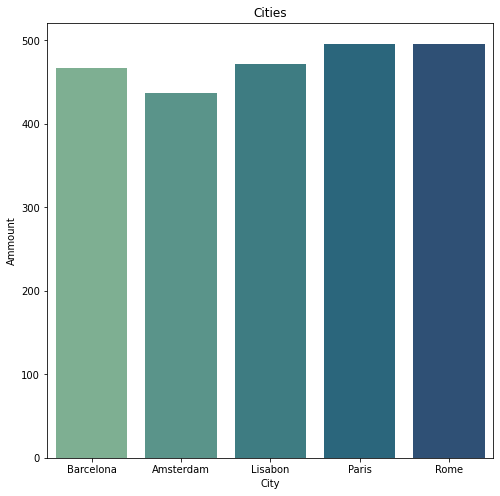

In [16]:
# After cleaning data contains 2367 hotels. Rome 496, Paris 495, Lisabon 472, Barcelona 467, Amsterdam 437

fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(ax=ax, x='City', data=data, palette="crest")
plt.title("Cities")
plt.xlabel("City")
plt.ylabel('Ammount')


In [17]:
# function to create Pets categories ( Allowed or Not allowed)
def pets_category (row):
    if row['Pets'] == 'Pets are not allowed.' :
        return 'Not allowed'
    elif row['Pets'] == 'Free!\n\n\nAll pools are free of charge':
        return 'No info'
    else:
        return 'Allowed'
    
pets_groups=data.apply (lambda row: pets_category(row), axis=1)
data['Pets TF'] = pets_groups

In [18]:
data.head()

,City,Name,Score,Price,Pets,Link,Pets TF
0,Barcelona,El Avenida Palace,8.8,111,Pets are allowed. Charges may be applicable.,https://www.booking.com/hotel/es/w-barcelona.e...,Allowed
1,Barcelona,W Barcelona,8.5,256,Pets are not allowed.,https://www.booking.com/hotel/es/negresco-prin...,Not allowed
2,Barcelona,Negresco Princess 4* Sup,8.3,77,Pets are not allowed.,https://www.booking.com/hotel/es/h10-cubik.en-...,Not allowed
3,Barcelona,Novotel Barcelona City,8.3,69,Free!\nPets are allowed on request. No extra c...,https://www.booking.com/hotel/es/avenidapalace...,Allowed
4,Barcelona,Ayre Hotel Rosellón,8.8,74,Pets are allowed on request. Charges may be ap...,https://www.booking.com/hotel/es/diagonal-zero...,Allowed


In [19]:
#cleaning data after creating pets categories
data.drop(['Pets'],axis=1, inplace=True)
data.rename(columns={'Pets TF':'Pets'},inplace = True)
data = data[['City','Name', 'Score', 'Price', 'Pets', 'Link']]

In [20]:
data.head()

,City,Name,Score,Price,Pets,Link
0,Barcelona,El Avenida Palace,8.8,111,Allowed,https://www.booking.com/hotel/es/w-barcelona.e...
1,Barcelona,W Barcelona,8.5,256,Not allowed,https://www.booking.com/hotel/es/negresco-prin...
2,Barcelona,Negresco Princess 4* Sup,8.3,77,Not allowed,https://www.booking.com/hotel/es/h10-cubik.en-...
3,Barcelona,Novotel Barcelona City,8.3,69,Allowed,https://www.booking.com/hotel/es/avenidapalace...
4,Barcelona,Ayre Hotel Rosellón,8.8,74,Allowed,https://www.booking.com/hotel/es/diagonal-zero...


Text(0, 0.5, 'Ammount')

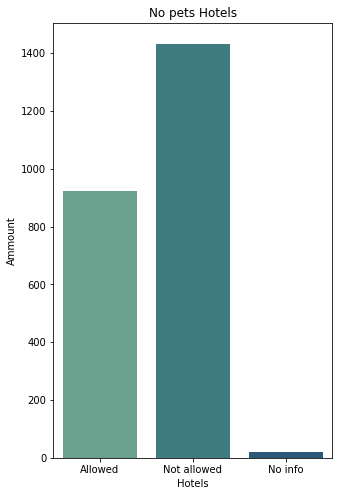

In [14]:
# There are 1430 hotels of the category 'Pets not allowed'
# 918 "Allowed"
# 19 there is no info about pets
fig, ax = plt.subplots(figsize=(5,8))
sns.countplot(ax=ax, x='Pets', data=data, palette="crest")
plt.title("No pets Hotels")
plt.xlabel("Hotels")
plt.ylabel('Ammount')

In [26]:
# Choosing palette
sns.set_palette("crest")
pets_palette = {"Allowed": "C5", "No info":"C2", "Not allowed":"C0"}

Text(0, 0.5, 'Ammount')

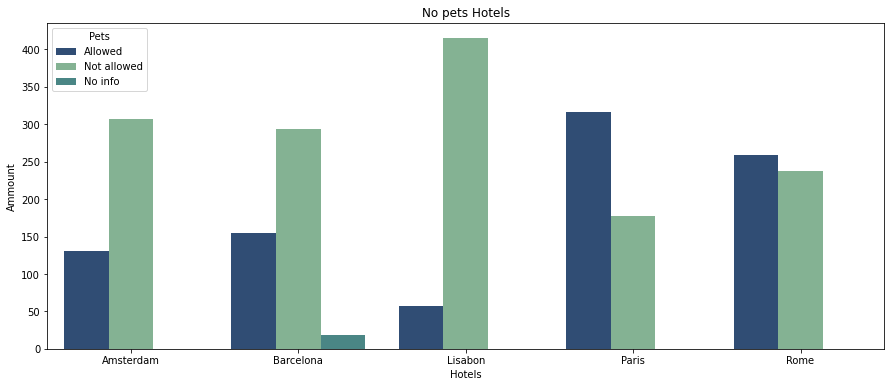

In [42]:
""" Amount of hotels by city that allow and do not allow acomandation with pets
Amsterdam: Not allowed - 307, Allowed - 130
Barcelona: Not allowed - 293, Allowed - 1
Lisabon: Not allowed - 415, Allowed - 57
Paris: Not allowed - 178, Allowed - 317
Rome: Not allowed - 259, Allowed - 237
"""
city_pets=data.groupby(['City', 'Pets'])['Price'].count().reset_index()

plt.figure(figsize=(15,6))
sns.barplot(x='City', y='Price', hue='Pets', data=city_pets, palette=pets_palette)
plt.title("No pets Hotels")
plt.xlabel("Hotels")
plt.ylabel('Ammount')

Text(0.5, 1.0, 'No pets Hotels')

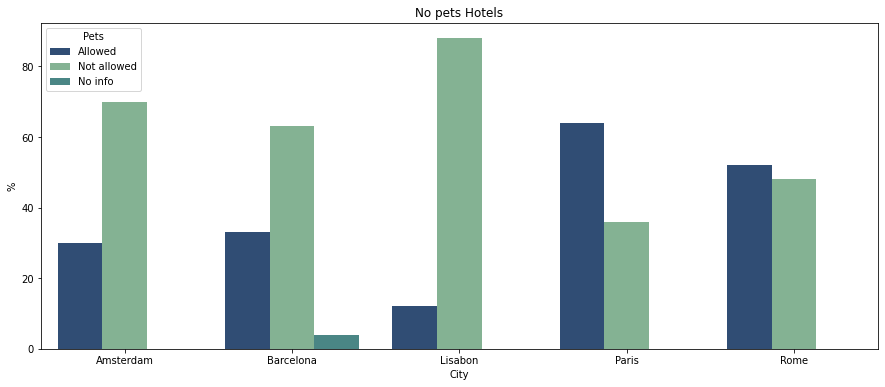

In [43]:
""" % of hotels by city that allow and do not allow acomandation with pets
Amsterdam: Not allowed - 70% , Allowed - 30%
Barcelona: Not allowed - 63%, Allowed - 33%, No info - 4%
Lisabon: Not allowed - 88%, Allowed - 12%
Paris: Not allowed - 36%, Allowed - 64%
Rome: Not allowed - 48%, Allowed - 52%
"""
city_pets=data.groupby(['City', 'Pets'])['Price'].count().reset_index()
city_total=data['City'].value_counts().reset_index().rename(columns={'index':'City','City':'Total'})
ct=city_pets.merge(right=city_total, how="left",left_on="City", right_on="City")

ct.rename(columns={'Price':'Amount'},inplace = True)

percents_city=round(ct['Amount']*100/ct['Total'])
ct['%'] = percents_city
fig_city, ax_city=plt.subplots(figsize=(15,6))
sns.barplot(ax=ax_city, x='City', y='%', hue='Pets', data=ct ,palette=pets_palette)
plt.title("No pets Hotels")


In [45]:
# Preparing data to create Price categories
price=data.groupby(['City', 'Pets'])['Price'].mean()
price=data['Price'].tolist()
df_price= pd.DataFrame(price)
names=data['Name'].tolist()
df_price['Names'] = names
df_price.rename(columns={0:'Price'},inplace = True)

In [48]:
# function to create Price categories ( Cheap, Normal, Expensive)
def price_category (row):
    if row['Price'] <= 50:
        return 'Cheap'
    elif row['Price'] >50 and row['Price']<=150:
        return 'Normal'
    elif row['Price'] >150:
        return 'Expensive'
    
price_groups=df_price.apply (lambda row: price_category(row), axis=1)
data['Price Groups'] = price_groups

<ipython-input-48-2d3da8b7bfc8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price Groups'] = price_groups


In [50]:
data.head()

,City,Name,Score,Price,Pets,Link,Price Groups
0,Barcelona,El Avenida Palace,8.8,111,Allowed,https://www.booking.com/hotel/es/w-barcelona.e...,Normal
1,Barcelona,W Barcelona,8.5,256,Not allowed,https://www.booking.com/hotel/es/negresco-prin...,Expensive
2,Barcelona,Negresco Princess 4* Sup,8.3,77,Not allowed,https://www.booking.com/hotel/es/h10-cubik.en-...,Normal
3,Barcelona,Novotel Barcelona City,8.3,69,Allowed,https://www.booking.com/hotel/es/avenidapalace...,Normal
4,Barcelona,Ayre Hotel Rosellón,8.8,74,Allowed,https://www.booking.com/hotel/es/diagonal-zero...,Normal


In [128]:
#saving data with created categories for further tableau visialization
data.to_csv('tableau_data.csv')

Text(0.5, 1.0, 'Rome')

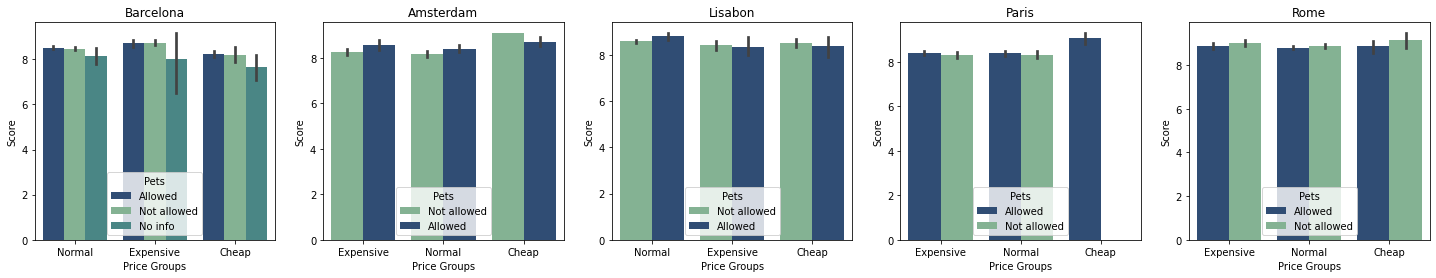

In [51]:
# creating plot to cheack amount of Cheap Normal and Expensive Hotels in each city
# Paris has no Cheap hotels that do not allow pets.
barcelona=data[data['City']=='Barcelona']
amsterdam=data[data['City']=='Amsterdam']
lisabon=data[data['City']=='Lisabon']
paris=data[data['City']=='Paris']
rome=data[data['City']=='Rome']

fig1_1, ax1_1 =plt.subplots(1,5,figsize=(25,4))
sns.barplot(data=barcelona, x='Price Groups',y='Score', hue='Pets', ax=ax1_1[0],palette=pets_palette)
ax1_1[0].set_title("Barcelona")
sns.barplot(data=amsterdam, x='Price Groups',y='Score', hue='Pets', ax=ax1_1[1],palette=pets_palette)
ax1_1[1].set_title("Amsterdam")
sns.barplot(data=lisabon, x='Price Groups',y='Score', hue='Pets', ax=ax1_1[2],palette=pets_palette)
ax1_1[2].set_title("Lisabon")
sns.barplot(data=paris, x='Price Groups',y='Score', hue='Pets', ax=ax1_1[3],palette=pets_palette)
ax1_1[3].set_title("Paris")
sns.barplot(data=rome, x='Price Groups',y='Score', hue='Pets', ax=ax1_1[4],palette=pets_palette)
ax1_1[4].set_title("Rome")

In [52]:
# Creating list of hotels with conditions: no pets, normal price categories, score higher or equal 9
me=data[data['Pets']=='Not allowed']
me_price=me[me['Price Groups']=="Normal"] 
me_score=me_price[me_price['Score']>=9]
len(me_score)

281

In [66]:
me_score

,City,Name,Score,Price,Pets,Link,Price Groups
5,Barcelona,H10 Cubik 4* Sup,9.2,137,Not allowed,https://www.booking.com/hotel/es/ciutat-de-bar...,Normal
10,Barcelona,H10 Casa Mimosa 4* Sup,9.4,134,Not allowed,https://www.booking.com/hotel/es/h10-casa-mimo...,Normal
28,Barcelona,Yurbban Passage Hotel & Spa,9.3,143,Not allowed,https://www.booking.com/hotel/es/ciutat-de-bar...,Normal
32,Barcelona,Midtown Apartments,9.5,119,Not allowed,https://www.booking.com/hotel/es/ohla.en-gb.html,Normal
37,Barcelona,Hotel Casa Luz,9.4,73,Not allowed,https://www.booking.com/hotel/es/wilson.en-gb....,Normal
...,...,...,...,...,...,...,...
2347,Rome,Latte & Biscotti,9.3,158,Not allowed,https://www.booking.com/hotel/it/residenza-pao...,Normal
2350,Rome,Vinci House,9.6,150,Not allowed,https://www.booking.com/hotel/it/mia-suites.en...,Normal
2353,Rome,Residenza Alexander Guest House,9.6,84,Not allowed,https://www.booking.com/hotel/it/condotti.en-g...,Normal
2356,Rome,Felikshouse,9.4,85,Not allowed,https://www.booking.com/hotel/it/borgo-pio-200...,Normal


Text(0, 0.5, 'Ammount')

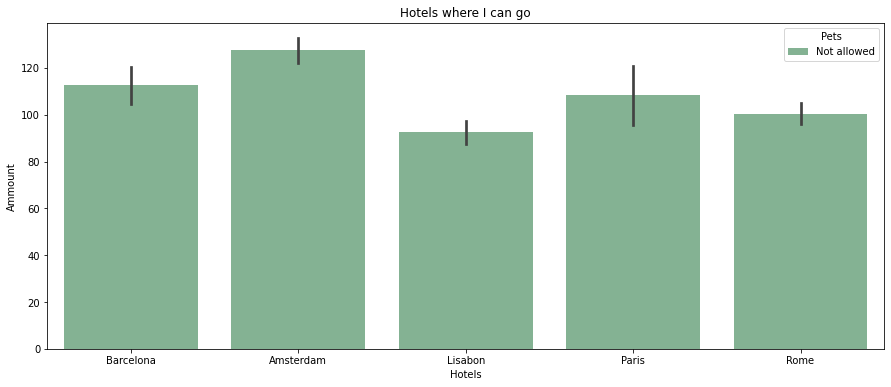

In [133]:
# There are 281 properties that match all the conditions menshioned above
# 98 properties in Lisabon, 94 - Rome, 42 - Amsterdam, 35 - Barcelona and only 12 in Paris
plt.figure(figsize=(15,6))
sns.barplot(x='City', y='Price', hue='Pets', data=me_score, palette=pets_palette)
plt.title("Hotels where I can go")
plt.xlabel("Hotels")
plt.ylabel('Ammount')

# Statistical analysis

In [72]:
stat_data=data.drop(data[data['Pets']=='No info'].index, inplace=False)

In [84]:
allowed=stat_data[stat_data['Pets']=="Allowed"]

In [85]:
not_allowed=stat_data[stat_data['Pets']=="Not allowed"]

In [82]:
allowed_price=allowed['Price'].tolist()

In [81]:
not_allowed_price=not_allowed['Price'].tolist()

In [80]:
stats.ttest_ind(allowed_price,not_allowed_price,equal_var=False)

Ttest_indResult(statistic=3.861751337948566, pvalue=0.00011614515979463996)

In [94]:
price_pets=stat_data.groupby(['Pets'])['Price'].count().reset_index()

Text(0, 0.5, 'Price')

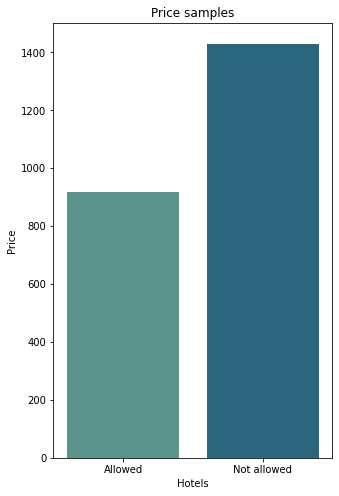

In [98]:
fig_stat_price, ax_stat_price = plt.subplots(figsize=(5,8))
sns.countplot(ax=ax_stat_price, x='Pets', data=stat_data, palette="crest")
plt.title("Price samples")
plt.xlabel("Hotels")
plt.ylabel('Price')

In [86]:
allowed_score=allowed['Score'].tolist()

In [88]:
not_allowed_score=not_allowed['Score'].tolist()

In [89]:
stats.ttest_ind(allowed_score,not_allowed_score,equal_var=False)

Ttest_indResult(statistic=2.352520811697907, pvalue=0.018736259300029288)

In [99]:
score_pets=stat_data.groupby(['Pets'])['Score'].count().reset_index()

Text(0, 0.5, 'Score')

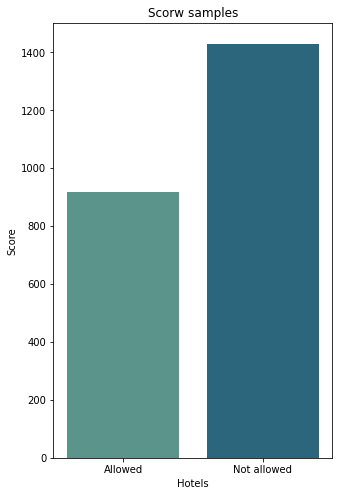

In [100]:
fig_stat_score, ax_stat_score = plt.subplots(figsize=(5,8))
sns.countplot(ax=ax_stat_score, x='Pets', data=stat_data, palette="crest")
plt.title("Scorw samples")
plt.xlabel("Hotels")
plt.ylabel('Score')